In [1]:
import os, shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from tqdm.notebook import tqdm as tq

In [2]:
import cv2
import skimage

from PIL import Image
from skimage import io
from skimage.transform import resize, rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma
from skimage.util import random_noise, img_as_ubyte

In [3]:
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from keras import Model, layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import MobileNetV2
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import TFSMLayer

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
trash_img = {}

path = "./Dataset_Final"

for i in os.listdir(path):
    trash_img[i] = os.listdir(os.path.join(path, i))

In [35]:
for i, class_name in enumerate(os.listdir(path)):
    print(i, class_name)

0 Sampah-Anorganik
1 Sampah-B3
2 Sampah-Elektronik
3 Sampah-Organik
4 Sampah-Residu


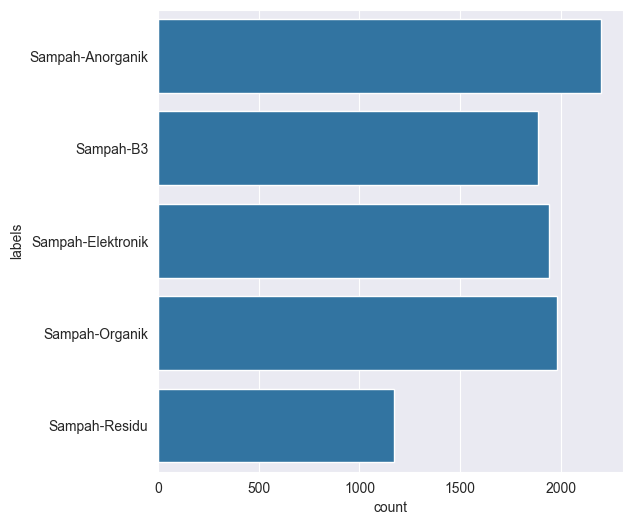

In [36]:
trash_path = "./Dataset_Final"

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(trash_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(os.path.basename(path))
        file_name.append(name)

distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

Label = distribution_train['labels']
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [37]:
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    sudut = random.randint(0, 180)
    return rotate(img, sudut)

def clockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    sudut = random.randint(0, 180)
    return rotate(img, -sudut)

def flip_up_down(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    return np.flipud(img)

def add_brightness(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    img = adjust_gamma(img, gamma=0.5, gain=1)
    return img

def blur_image(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    return cv2.GaussianBlur(img, (7, 7), 0)

def sheared(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    transform = AffineTransform(shear=0.25)
    shear_img = warp(img, transform, mode="wrap")
    return shear_img

def warp_shift(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    transform = AffineTransform(translation=(0, 30))
    warp_img = warp(img, transform, mode="wrap")
    return warp_img

In [38]:
transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'rotate clockwise': clockwise_rotation,
    'warp shift': warp_shift,
    'bluring image': blur_image,
    'add brightness': add_brightness,
    'flip up down': flip_up_down,
    'shear image': sheared
}

data_classes = {
    "Sampah-B3": {
        "image_path": "./Dataset_Final/Sampah-B3",
        "augmented_path": "./Dataset_Final/Sampah-B3",
        "target": 400
    },
    "Sampah-Elektronik": {
        "image_path": "./Dataset_Final/Sampah-Elektronik", 
        "augmented_path": "./Dataset_Final/Sampah-Elektronik",
        "target": 200
    },
    "Sampah-Organik": {
        "image_path": "./Dataset_Final/Sampah-Organik",
        "augmented_path": "./Dataset_Final/Sampah-Organik",
        "target": 200
    },
    "Sampah-Residu": {
        "image_path": "./Dataset_Final/Sampah-Residu",
        "augmented_path": "./Dataset_Final/Sampah-Residu",
        "target": 1000
    }
}

for kelas_data, data in data_classes.items():
    image_path = data["image_path"]
    augmented_path = data["augmented_path"]
    images_to_generate = data["target"]

    images = []

    for img in os.listdir(image_path):
        images.append(os.path.join(image_path, img))

    i = 1
    while i <= images_to_generate:
        image = random.choice(images)
        try:
            original_img = io.imread(image)
            transformed_img = None
            n = 0
            transformation_count = random.randint(1, len(transformations))

            while n <= transformation_count:
                key = random.choice(list(transformations))
                transformed_img = transformations[key](original_img)
                n =  n + 1
            
            original_name = os.path.basename(image)
            filename = f"{os.path.splitext(original_name)[0]}_augmented_{i}.jpg"
            new_image_path = os.path.join(image_path, filename)

            transformed_img = img_as_ubyte(transformed_img)
            cv2.imwrite(new_image_path, transformed_img)
            i += 1

        except ValueError as e:
            print('could not read the ', image, ' :', e, ' hence skipping it')


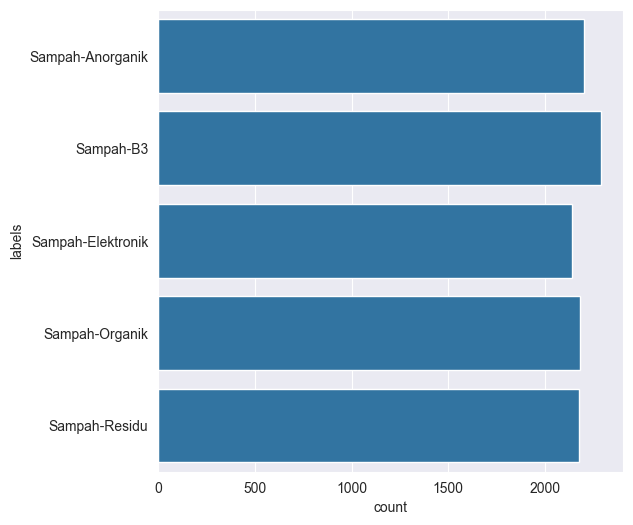

In [39]:
trash_path = "./Dataset_Final"

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(trash_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(os.path.basename(path))
        file_name.append(name)

distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

Label = distribution_train['labels']
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [40]:
print(file_name[0], labels[0], full_path[0])

plastic1.jpg Sampah-Anorganik ./Dataset_Final\Sampah-Anorganik\plastic1.jpg


In [41]:
df = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

df.groupby(['labels']).size()

labels
Sampah-Anorganik     2200
Sampah-B3            2289
Sampah-Elektronik    2141
Sampah-Organik       2182
Sampah-Residu        2174
dtype: int64

In [42]:
X = df['path']
y = df['labels']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [43]:
df_tr = pd.DataFrame({'path': x_train, 'labels': y_train, 'set': 'train'})
df_te = pd.DataFrame({'path': x_test, 'labels': y_test, 'set': 'test'})

In [44]:
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print(df_all.groupby(['set', 'labels']).size(), '\n')
print(df_all.sample(5))

set    labels           
test   Sampah-Anorganik      460
       Sampah-B3             447
       Sampah-Elektronik     408
       Sampah-Organik        425
       Sampah-Residu         458
train  Sampah-Anorganik     1740
       Sampah-B3            1842
       Sampah-Elektronik    1733
       Sampah-Organik       1757
       Sampah-Residu        1716
dtype: int64 

                                                   path            labels  \
4148   ./Dataset_Final\Sampah-Organik\biological945.jpg    Sampah-Organik   
6114    ./Dataset_Final\Sampah-Anorganik\plastic720.jpg  Sampah-Anorganik   
3012   ./Dataset_Final\Sampah-Organik\biological585.jpg    Sampah-Organik   
8054  ./Dataset_Final\Sampah-Residu\trash346_augment...     Sampah-Residu   
3643   ./Dataset_Final\Sampah-Organik\biological666.jpg    Sampah-Organik   

        set  
4148  train  
6114  train  
3012  train  
8054  train  
3643  train  


In [45]:
datasource_path  = "./Dataset_Final"
dataset_path = "./Dataset_Final_Preprocess"

In [46]:
for index, row in tq(df_all.iterrows()):
    file_path = row['path']

    if not os.path.exists(file_path):
        file_path = os.path.join(datasource_path, row['labels'], row['image'])

    dest_folder = os.path.join(dataset_path, row['set'], row['labels'])
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    destination_file_name = os.path.basename(file_path)

    file_dest = os.path.join(dest_folder, destination_file_name)

    if not os.path.exists(file_dest):
        shutil.copy2(file_path, file_dest)


0it [00:00, ?it/s]

In [47]:
TRAIN_DIR = "./Dataset_Final_Preprocess/train"
TEST_DIR = "./Dataset_Final_Preprocess/test"

train_anorganik = os.path.join(TRAIN_DIR + '/Sampah-Anorganik')
train_b3 = os.path.join(TRAIN_DIR + '/Sampah-B3')
train_elektronik = os.path.join(TRAIN_DIR + '/Sampah-Elektronik')
train_organik = os.path.join(TRAIN_DIR + '/Sampah-Organik')
train_residu = os.path.join(TRAIN_DIR + '/Sampah-Residu')
test_anorganik = os.path.join(TEST_DIR + '/Sampah-Anorganik')
test_b3 = os.path.join(TEST_DIR + '/Sampah-B3')
test_elektronik = os.path.join(TEST_DIR + '/Sampah-Elektronik')
test_organik = os.path.join(TEST_DIR + '/Sampah-Organik')
test_residu = os.path.join(TEST_DIR + '/Sampah-Residu')

print("Total sampah anorganik images di train set:", len(os.listdir(train_anorganik)))
print("Total sampah b3 images di train set:", len(os.listdir(train_b3)))
print("Total sampah elektronik images di train set:", len(os.listdir(train_elektronik)))
print("Total sampah organik images di train set:", len(os.listdir(train_organik)))
print("Total sampah residu images di train set:", len(os.listdir(train_residu)))
print("\n")
print("Total sampah anorganik images di test set:", len(os.listdir(test_anorganik)))
print("Total sampah b3 images di test set:", len(os.listdir(test_b3)))
print("Total sampah elektronik images di test set:", len(os.listdir(test_elektronik)))
print("Total sampah organik images di test set:", len(os.listdir(test_organik)))
print("Total sampah residu images di test set:", len(os.listdir(test_residu)))

Total sampah anorganik images di train set: 1740
Total sampah b3 images di train set: 1842
Total sampah elektronik images di train set: 1733
Total sampah organik images di train set: 1757
Total sampah residu images di train set: 1716


Total sampah anorganik images di test set: 460
Total sampah b3 images di test set: 447
Total sampah elektronik images di test set: 408
Total sampah organik images di test set: 425
Total sampah residu images di test set: 458


In [48]:
datagen = ImageDataGenerator(rescale=1/.255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size = 32,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'training',
    shuffle = True
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size = 32,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    subset = 'validation',
    shuffle = False
)

test_generator = datagen.flow_from_directory(
    TEST_DIR,
    batch_size = 1,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'sparse',
    shuffle = False
)

Found 7032 images belonging to 5 classes.
Found 1756 images belonging to 5 classes.
Found 2198 images belonging to 5 classes.


In [49]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze dulu

model_1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

In [61]:
# model_1 = Sequential()

# # (224, 224, 3) = 3 merupakan rgb
# model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# model_1.add(BatchNormalization())
# model_1.add(MaxPool2D((2, 2)))

# model_1.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
# model_1.add(BatchNormalization())
# model_1.add(MaxPool2D((2, 2)))

# model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# model_1.add(BatchNormalization())
# model_1.add(MaxPool2D((2, 2)))

# model_1.add(Flatten())

# model_1.add(Dense(256, activation='relu'))
# model_1.add(Dropout(0.5))

# model_1.add(Dense(128, activation='relu'))
# model_1.add(Dropout(0.5))

# model_1.add(Dense(64, activation='relu'))
# model_1.add(Dropout(0.3))

# model_1.add(Dense(5, activation='softmax'))

In [50]:
model_1.compile(
    optimizer = Adam(learning_rate=1e-4),
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [51]:
print(model_1.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,619,461 (9.99 MB)

 Trainable params: 361,477 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [ ]:
# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.3,
#     patience=5,
#     min_lr=1e-6
# )

In [52]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.92):
            print("\nAkurasi telah mencapai > 92%")
            self.model.stop_training = True

callbacks = MyCallback()

In [53]:
count_anorganik, count_b3, count_elektronik, count_organik, count_residu = len(os.listdir(train_anorganik)), len(os.listdir(train_b3)), len(os.listdir(train_elektronik)), len(os.listdir(train_organik)), len(os.listdir(train_residu))
weight_0 = (1 / count_anorganik) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_1 = (1 / count_b3) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_2 = (1 / count_elektronik) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_3 = (1 / count_organik) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
weight_4 = (1 / count_residu) * (count_anorganik + count_b3 + count_elektronik + count_organik + count_residu) / 5.0
 
class_weights = {0 : weight_0, 1 : weight_1, 2 : weight_2, 3 : weight_3, 4 : weight_4}

In [54]:
history_1 = model_1.fit(
    train_generator,
    batch_size=32,
    epochs=100,
    class_weight=class_weights,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 158s 706ms/step - accuracy: 0.4818 - loss: 1.3011 - val_accuracy: 0.6384 - val_loss: 0.9862
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 63s 285ms/step - accuracy: 0.6635 - loss: 0.8903 - val_accuracy: 0.6788 - val_loss: 0.8740
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 63s 288ms/step - accuracy: 0.7136 - loss: 0.7598 - val_accuracy: 0.6965 - val_loss: 0.8288
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 64s 291ms/step - accuracy: 0.7418 - loss: 0.6921 - val_accuracy: 0.7107 - val_loss: 0.7867
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 64s 289ms/step - accuracy: 0.7595 - loss: 0.6498 - val_accuracy: 0.7289 - val_loss: 0.7461
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 64s 289ms/step - accuracy: 0.7801 - loss: 0.6047 - val_accuracy: 0.7301 - val_loss: 0.7630
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 64s 289ms/step - accuracy: 0.7938 - loss: 0.5639 - val_accuracy: 0.7420 - val_loss: 0.7299
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 63s 289ms/step - accuracy: 0.8047 

In [55]:
model_1.evaluate(test_generator, batch_size=5)

2198/2198 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.8649 - loss: 0.4154


[0.41540688276290894, 0.8648771643638611]

55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step


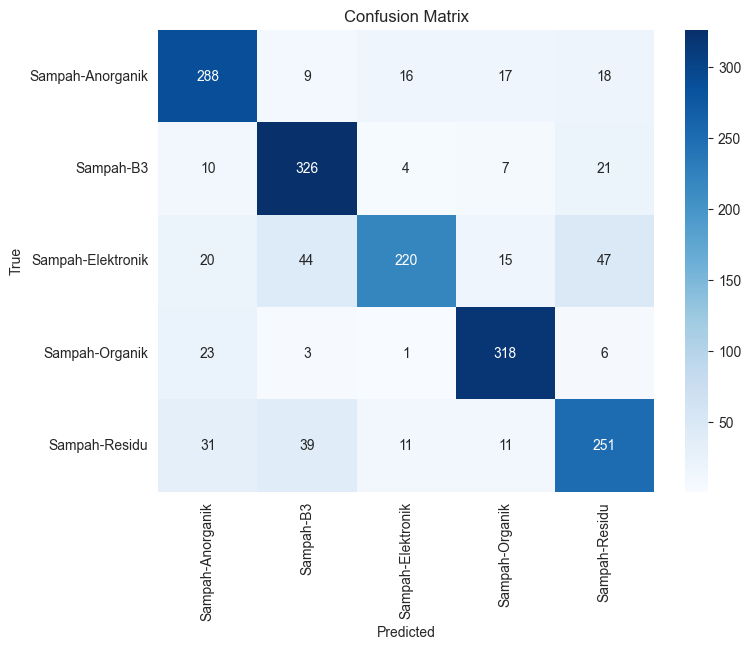

Classification Report:

                   precision    recall  f1-score   support

 Sampah-Anorganik       0.77      0.83      0.80       348
        Sampah-B3       0.77      0.89      0.83       368
Sampah-Elektronik       0.87      0.64      0.74       346
   Sampah-Organik       0.86      0.91      0.88       351
    Sampah-Residu       0.73      0.73      0.73       343

         accuracy                           0.80      1756
        macro avg       0.80      0.80      0.80      1756
     weighted avg       0.80      0.80      0.80      1756



In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# Prediksi di validation/test set
# -----------------------------
y_true = validation_generator.classes  # label asli
y_pred_probs = model_1.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)  # ambil kelas dengan probabilitas tertinggi

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_true, y_pred)
class_labels = list(validation_generator.class_indices.keys())  # nama kelas

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


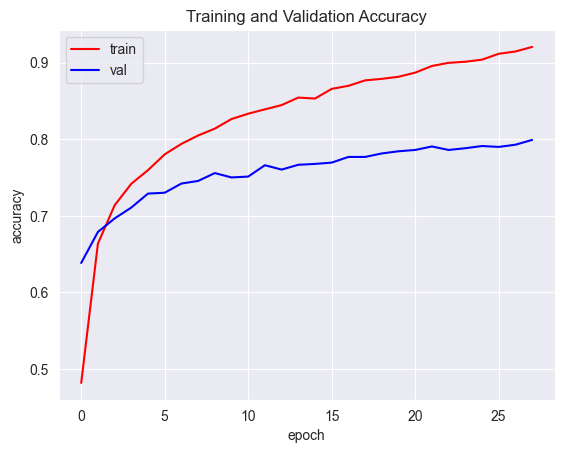

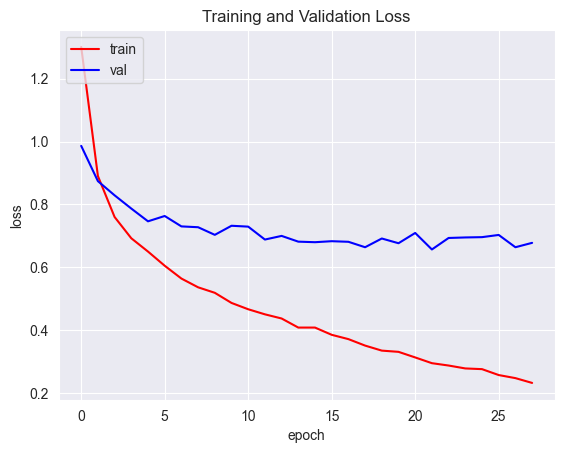

In [57]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
 
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
model_1.save("model.h5")

In [65]:
model = tf.keras.models.load_model('./model.h5')

In [66]:
# Buat converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) Optimisasi ukuran
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi
tflite_model = converter.convert()

# Simpan model .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmp5e66jq9s\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmp5e66jq9s\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmp5e66jq9s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2040940722320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940721744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940723472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940721552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940722512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940722128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940720784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940720976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940720400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2040940723664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  20409

In [67]:
print(tf.__version__)

2.20.0


In [68]:
class_names = train_generator.class_indices
print(class_names)

{'Sampah-Anorganik': 0, 'Sampah-B3': 1, 'Sampah-Elektronik': 2, 'Sampah-Organik': 3, 'Sampah-Residu': 4}


In [73]:
# Load model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Ambil detail input & output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

labels = ["anorganik", "b3", "elektronik", "organik", "residu"]

# Fungsi preprocessing gambar
def preprocess_image(image_path, input_shape):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((input_shape[1], input_shape[2]))
    img = np.array(img, dtype=input_details[0]['dtype'])
    img = np.expand_dims(img, axis=0) 
    return img

# Uji 1 gambar
image_path = "3.jpg"
input_shape = input_details[0]['shape']
img = preprocess_image(image_path, input_shape)

# Set input
interpreter.set_tensor(input_details[0]['index'], img)

# Run inference
interpreter.invoke()

# Ambil output
output_data = interpreter.get_tensor(output_details[0]['index'])[0]
pred_idx = np.argmax(output_data)
pred_label = labels[pred_idx]
confidence = output_data[pred_idx]

print(f"Prediksi: {pred_label} ({confidence:.2f})")


Prediksi: elektronik (0.94)
